<a href="https://colab.research.google.com/github/Ahmadfadelibrahim/TugasPertemuan11/blob/master/minggu13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print (d)

[643 306 651 440 598 672 314 694 525 332 277 291 401 259 218 485 677 231
 243 370 208 272 277 366 286 573 422 565 536 655 242 447 326 558 400 497
 571 216 617 441 650 241 234 259 502 669 481 492 308 618 367 305 619 412
 499 513 227 554 354 491 621 281 276 540 583 353 644 422 403 642 459 488
 302 489 210 240 364 579 424 325 616 671 327 554 421 297 693 641 364 229
 362 355 352 480 255 372 214 558 465 594 627 473 371 651 335 205 667 525
 461 452 430 471 403 459 506 499 605 474 508 258 561 381 331 670 447 472
 266 602 353 625 317 252 683 358 606 318 687 340 558 642 557 344 218 573
 663 250 425 638 430 553 249 622 581 623 563 463 312 471 312 521 669 352
 653 518 695 248 608 362 271 506 368 558 226 260 680 459 653 385 293 619
 370 496 607 406 689 227 637 343 347 685 274 255 588 380 670 408 513 584
 376 690]


In [5]:
LpUrban=cos(f,loc,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [6]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

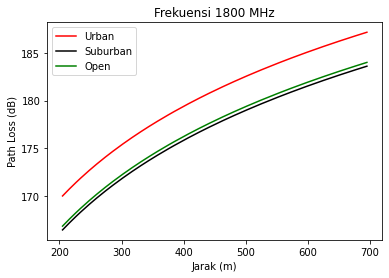

In [8]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'k-', label='Suburban')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [10]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)


In [11]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [12]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

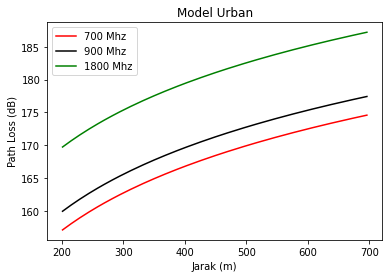

In [13]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()